<a href="https://colab.research.google.com/github/elanoris/ID002/blob/main/amarjaganjac_Model_Window_10_previous_records_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Input,Conv1D, Conv2D, ReLU, Concatenate,LSTM,Dense,Flatten,add,TimeDistributed,MaxPool2D, GRU
from keras import Sequential,Model,models
from keras.regularizers import l2
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Read Dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ML/2020-9-22--550hours.csv" , index_col="datetime")
data.head()

,INNDAER 1,AM-LUTVLAS A,BOR VEKT A,DOLOM VEKT A,Kalivekt A,MGO VEKT,NPLUT-INND A,SALTVEKT TT W3401,Turtallsreg. Fuge A,Temperatur mikser A1,...,Turtallsreg. Fuge B,Temperatur mikser B1,Temperatur mikser B3,Temperatur T3402 inndamping væskelås,Væskelås B -> MIX B,Væskelås B -> MIX A,Væskelås A -> MIX B,Væskelås A -> MIX A,NPLUT-INND B,neoScattering
datetime,,,,,,,,,,,,,,,,,,,,,
2020-09-22 08:56:06,0.781092,26.519396,4.629490,0.015649,0.635937,0.095390,30.039738,40.477000,324.442160,41.287181,...,324.372223,113.223134,112.283353,184.272961,False,False,False,False,30.040635,2.327032
2020-09-22 08:56:16,0.780581,26.876701,4.629533,0.015649,0.644175,0.096653,29.894164,40.478285,324.216285,41.346787,...,324.632507,112.656876,111.810486,184.408853,False,True,False,False,30.086357,2.327000
2020-09-22 08:56:26,0.780071,26.841930,4.629576,0.015650,0.652414,0.097916,29.888657,40.479571,323.990409,42.271664,...,323.534198,112.142281,111.307810,184.532822,False,True,False,False,30.132080,2.004000
2020-09-22 08:56:36,0.779006,26.914482,4.629619,0.015650,0.660653,0.099179,29.815544,40.480857,325.125764,54.836514,...,324.473541,111.643585,110.777321,184.597794,False,True,False,False,30.117502,1.788500
2020-09-22 08:56:46,0.779640,26.974942,4.629654,0.015650,0.667518,0.100231,29.799110,40.481928,325.325733,79.778458,...,324.473541,111.238269,110.391874,184.642502,False,True,False,False,30.095304,1.991000


## Encode and Normalization

we will encode the columns with categorical data and normalize the data, to do so we use The MinMaxScaler function, it will encode and normalize the data in the same time


In [ ]:
min_max_scaler = MinMaxScaler()
F_data = pd.DataFrame(data = min_max_scaler.fit_transform(data), 
                  index = data.index, 
                  columns = data.columns)

In [ ]:
F_data.head()

,INNDAER 1,AM-LUTVLAS A,BOR VEKT A,DOLOM VEKT A,Kalivekt A,MGO VEKT,NPLUT-INND A,SALTVEKT TT W3401,Turtallsreg. Fuge A,Temperatur mikser A1,...,Turtallsreg. Fuge B,Temperatur mikser B1,Temperatur mikser B3,Temperatur T3402 inndamping væskelås,Væskelås B -> MIX B,Væskelås B -> MIX A,Væskelås A -> MIX B,Væskelås A -> MIX A,NPLUT-INND B,neoScattering
datetime,,,,,,,,,,,,,,,,,,,,,
2020-09-22 08:56:06,0.172092,0.327384,0.023149,0.001701,0.429059,0.224285,0.476186,0.708650,0.570587,0.098196,...,0.752295,0.564865,0.560115,0.959870,0.0,0.0,0.0,0.0,0.396145,0.440067
2020-09-22 08:56:16,0.170818,0.331793,0.023149,0.001701,0.429245,0.224566,0.473873,0.708693,0.570187,0.098573,...,0.752902,0.561342,0.557172,0.960739,0.0,1.0,0.0,0.0,0.396749,0.440064
2020-09-22 08:56:26,0.169544,0.331364,0.023149,0.001701,0.429432,0.224847,0.473786,0.708737,0.569788,0.104410,...,0.750339,0.558140,0.554042,0.961531,0.0,1.0,0.0,0.0,0.397353,0.416463
2020-09-22 08:56:36,0.166885,0.332260,0.023149,0.001701,0.429619,0.225129,0.472624,0.708781,0.571796,0.183718,...,0.752531,0.555038,0.550740,0.961946,0.0,1.0,0.0,0.0,0.397161,0.400716
2020-09-22 08:56:46,0.168470,0.333006,0.023150,0.001701,0.429775,0.225363,0.472363,0.708817,0.572150,0.341149,...,0.752531,0.552516,0.548340,0.962232,0.0,1.0,0.0,0.0,0.396867,0.415513


## Create inputs and outputs

In [ ]:
inputs  = F_data.iloc[:,:] # read all data as input
outputs = F_data.iloc[:,-1] # Use the last Columns 'neoScattering' as output

In [ ]:
trsize = int(len(inputs)*0.9) # the size of training Data
ts_size = len(inputs)-trsize  # the size of testing Data

Trai_Inp = inputs[0:int(trsize*0.7)]   
Tr_A_Out = outputs[0:int(trsize*0.7)]

valid_inp = inputs[int(trsize*0.7):trsize]
valid_out = outputs[int(trsize*0.7):trsize]

Test_Inp = inputs[trsize:]
Ts_A_out = outputs[trsize:]

print('training data size : ',Trai_Inp.shape,Tr_A_Out.shape)
print('Validation data size : ',valid_inp.shape,valid_out.shape)
print('Testing data size : ',Test_Inp.shape,Ts_A_out.shape)

training data size :  (124828, 31) (124828,)
Validation data size :  (53498, 31) (53498,)
Testing data size :  (19814, 31) (19814,)


In [ ]:
def create_dataset(data_in,out, time_step = 10):
	"""
	this function will prepare the data to be ready to feed to The Neural network, 
	it will use 10 previous inputs records and use the 11th  neoScattering records as output
	"""
	dataX, dataY = [], []
	for i in range(len(out)-time_step-2):
		  
		  x = data_in[i:(i+time_step)] ###i=0, 0,1,2,3-----99   100
		  y = out[i+time_step+1]
	
		  dataX.append(x)
		  dataY.append(y)
	
	return np.array(dataX), np.array(dataY)

In [ ]:
inpTr ,Out_tr  = create_dataset(Trai_Inp , Tr_A_Out,  time_step = 10)
inpVal,out_val = create_dataset(valid_inp, valid_out, time_step = 10)
inpTs ,Out_ts  = create_dataset(Test_Inp , Ts_A_out,  time_step = 10)

## Build Model

### Model Architecture

in order to get the best results i used the model in the article [here](https://arxiv.org/pdf/2105.00707.pdf) 

In [ ]:
n_timesteps, n_features = inpTr.shape[1], inpTr.shape[2]
inp = Input(shape=(n_timesteps,n_features,1),name='inp')
feat = Conv1D(filters = 16, kernel_size = 1, strides = 1, padding = 'same', use_bias = False, activation ='relu')(inp)

x1 = Conv1D(filters = 16, kernel_size = 1, strides = 1, padding = 'same', use_bias = False,activation ='relu')(feat)
x2 = Conv1D(filters = 16, kernel_size = 2, strides = 1, padding = 'same', use_bias = False,activation ='relu')(feat)
x3 = Conv1D(filters = 16, kernel_size = 3, strides = 1, padding = 'same', use_bias = False,activation ='relu')(feat)

out = add([feat,x1,x2,x3])

out = Conv2D(filters = 32, kernel_size = 1, strides = 1, padding = 'same', use_bias = False,activation='relu')(out)
out = Conv2D(filters=64, kernel_size=1,padding='same',activation='relu')(out)

out2= Conv2D(filters=64, kernel_size=1,padding='same',activation='relu')(inp)
out = add([out2,out])

out = Flatten()(out)
out = tf.keras.layers.Reshape((19840,1))(out)


out = GRU(50,activity_regularizer=l2(0.0000001))(out)
out = Dense(50) (out)

out = Dense(100) (out)

out = tf.keras.layers.Dropout(0.3)(out)
out = Dense(20) (out)

out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(1,activation = 'relu') (out)

### Model compile, loss and plot

In [ ]:
model = Model(inputs = [inp] ,outputs = [out]) # 
model.compile(loss='mse', optimizer='adam', metrics=['mse',"mae"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inp (InputLayer)               [(None, 10, 31, 1)]  0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 10, 31, 16)   16          ['inp[0][0]']                    
                                                                                                  
 conv1d_1 (Conv1D)              (None, 10, 31, 16)   256         ['conv1d[0][0]']                 
                                                                                                  
 conv1d_2 (Conv1D)              (None, 10, 31, 16)   512         ['conv1d[0][0]']                 
                                                                                              

## Train and evaluation the model

### Train

In [ ]:
model.fit(inpTr ,Out_tr,validation_data=(inpVal,out_val),epochs = 2, batch_size=256, verbose=1)

Epoch 1/2
488/488 [==============================] - 455s 907ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0409 - val_loss: 6.6317e-04 - val_mse: 6.6317e-04 - val_mae: 0.0183
Epoch 2/2
488/488 [==============================] - 410s 840ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0247 - val_loss: 5.4012e-04 - val_mse: 5.4012e-04 - val_mae: 0.0159


### Evaluation

we will pick randomly 100 inputs and predict thier outputs then plot the result with the ground truth

In [ ]:
Size = 100 
ix     = np.random.randint(0, inpTs.shape[0], Size)
X      = inpTs[ix]  # The 100 random inputs
Y = np.expand_dims(Out_ts[ix],1) # The ground truth Y of the random inputs

### Prediction using The model and reshape to perform inverse Minmax transform
predicted_results = np.reshape(model.predict(X),(Size,1))

In [ ]:
predicted_results = np.reshape(model.predict(X),(Size,1))

In [ ]:
Inverse = MinMaxScaler() # inverse minmax transform for Y
Inverse.fit(np.expand_dims(data['neoScattering'],-1))

MinMaxScaler()

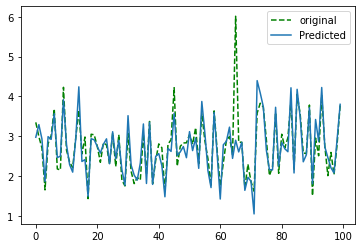

In [ ]:

plt.plot(Inverse.inverse_transform(Y),'g--', label="original")
plt.plot(Inverse.inverse_transform(predicted_results), label = "Predicted")
plt.legend()
plt.show()

In [ ]:
mse = tf.keras.losses.MeanSquaredError() 
mae = tf.keras.losses.MeanAbsoluteError()
print(f"Mean squered error = {mse(predicted_results,Y)}")
print(f"Mean Absolute error = {mae(predicted_results,Y)}")

Mean squered error = 0.0008682832703925669
Mean Absolute error = 0.016757525503635406
